In this example we will learn implementing linear regression using PyTorch. In this example I have used beer consumption CSV available on [Kaggle](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo). 

**1. Imports**
Please import the necessarty libraries required for the programm.
1. Numpy : Numpy library in python provides support large multi-dimensional arrays and matrices. It also provides high-level mathematical function to operate on these arrays.
2. Pandas : Pandas library provides support for data analysis and manipulation tool. 
3. torch : PyTorch is the machine learning library.
4. Matplotlib : We have used Matplotlib library for showing line graphs and visual comparision.

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

**2. Data processing**

We have used Pandas for data analysis and data manipulation. We will take average tempreature to create linear regression model

 1. Reading the data from the CSV file
 2. Dropping the columns like Date
 3. Removing the rows based on the column value
 4. Creating new dataframes like target and input

In [2]:
beer_consumption_data = pd.read_csv("./data/consumption.csv")

In [3]:
print(beer_consumption_data[0:5])

         Date  T_Media  T_Minima  T_Maxima  Precipitation  Weekend  \
0  2015-01-01    27.30      23.9      32.5            0.0        0   
1  2015-01-02    27.02      24.5      33.5            0.0        0   
2  2015-01-03    24.82      22.4      29.9            0.0        1   
3  2015-01-04    23.98      21.5      28.6            1.2        1   
4  2015-01-05    23.82      21.0      28.3            0.0        0   

   Consumption  
0       25.461  
1       28.972  
2       30.814  
3       29.799  
4       28.900  


In [4]:
data = beer_consumption_data.drop(['Date'], axis=1)

In [5]:
data = data[data.Weekend != 1]

In [6]:
print(data[0:5])

   T_Media  T_Minima  T_Maxima  Precipitation  Weekend  Consumption
0    27.30      23.9      32.5            0.0        0       25.461
1    27.02      24.5      33.5            0.0        0       28.972
4    23.82      21.0      28.3            0.0        0       28.900
5    23.78      20.1      30.5           12.2        0       28.218
6    24.00      19.5      33.7            0.0        0       29.732


In [7]:
target = data["Consumption"]

In [8]:
input_data = data.drop(['Consumption','Weekend'], axis=1)
input_data['Tem Avg']= input_data.iloc[:, -4:-1].sum(axis=1)/3
input_data = input_data.drop(['T_Media','T_Minima','T_Maxima','Precipitation'], axis=1)

In [9]:
print(input_data[0:5])

     Tem Avg
0  27.900000
1  28.340000
4  24.373333
5  24.793333
6  25.733333


In [10]:
print(target[0:5])

0    25.461
1    28.972
4    28.900
5    28.218
6    29.732
Name: Consumption, dtype: float64


**3. Tensors**
In the above data processing steps, we have created inputs data which is of size 261x4 and target data which is of 261x1 dimension. Now we will be converting these data into tensors for the further processing. Pytorch tensors are the basic data structures which we use for programming neural network.

`torch.tensor()` is multi-dimensional matrix which contain elements of a single data type.

In [11]:
input_tensor = torch.tensor(input_data.values)

In [12]:
print(input_tensor[0:5])

tensor([[27.9000],
        [28.3400],
        [24.3733],
        [24.7933],
        [25.7333]], dtype=torch.float64)


In [13]:
target_tensor = torch.tensor(target.values)

**4. Model and Paramters**
The linear equation we are using `y = b+wx`
        Here, b is bias, it is a scalar value
              w is the weight and x is the input paramater
              x is ( 1 x 1 ) matrix and w is (1 x 1 ) matrix
We will define the model Parameters w and b

1. We will generating w and b random number using `torch.randn()`
2. Below w and b datatype is double which is defined by `dtype=torch.double`
3. `requires_grad=True` , this flag specify autograd to record operations performed on the tensor. We can call grad on a parameter `<parameter name>.grad`to find out the value of gradient.
4. `torch.t()` is method to obtain transpose of a matrix

In [14]:
w = torch.randn(1,dtype=torch.double,requires_grad=True)
b = torch.randn(1, dtype=torch.double,requires_grad=True)
print(w)
print(b)

tensor([2.2838], dtype=torch.float64, requires_grad=True)
tensor([1.2180], dtype=torch.float64, requires_grad=True)


In [15]:
def model(x):
    return x @ w.t() + b

**5. Predicting values**
preds is the value predicted by our model based on random parameters weight and bias we have generated

In [16]:
preds = model(input_tensor)
print(preds[0:5])

tensor([64.9347, 65.9396, 56.8807, 57.8398, 59.9866], dtype=torch.float64,
       grad_fn=<SliceBackward>)


**6. Loss function**
We have used mean square error (mse) for the loss functions
1. mse is obtained by adding the square of the difference between predicted value and actual value of each input
2. Squaring the difference of predicted value and actual value ensure that larger the difference then error will be large and smaller the difference then error will small
3. mse is either 0 or positive value
4. smaller the mse better the prediction

In [17]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [18]:
loss = mse(preds, target_tensor)
print(loss)

tensor(765.9447, dtype=torch.float64, grad_fn=<DivBackward0>)


**7. backward function()**
We are using gradient descent method to train our model. In gradient descent, we minimise the loss. To minimise the loss we have to perform differential method w.r.t to paramaters on the loss function.
Here, backward() functions do all the mathematical work for you using the last output of weight and bias parameters

In [19]:
loss.backward()

In [20]:
print(w)
print(w.grad)

tensor([2.2838], dtype=torch.float64, requires_grad=True)
tensor([1217.6716], dtype=torch.float64)


In [21]:
print(b)
print(b.grad)

tensor([1.2180], dtype=torch.float64, requires_grad=True)
tensor([54.3411], dtype=torch.float64)


**8. Learning Rate**
It is important hyperparameter for linear regression. It is the amount by which weigth are updated during the training process
1. It defines the direction of gradient descent. 
2. We need to carefully define the learning rate

    2.1 Using large value of learning rate require less training epochs amd cause model to converge quickly to a suboptimal solution. We may miss the actual minima for the model equation.
    
    2.2 Using very small value of learning rate may lead more calculation. As it will require more training epochs for converging the model
    
3. We are making the gradient from the previous calculation zero to avoid a mix using zero_(). As with `requires_grad=True` is ensuring gradient accumulation for parameters `w` and `b`
4. In this example, we have use learning rate  value 0.00001

In [22]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [23]:
print(w)

tensor([2.2716], dtype=torch.float64, requires_grad=True)


**9. Predicting beer consumption**

Here we are predicting value for beer consumption and we are using matplotlib to visualize and compare between predicted value and actual value.

In [24]:
preds = model(input_tensor)
loss = mse(preds, target_tensor)
print(loss)

tensor(751.1606, dtype=torch.float64, grad_fn=<DivBackward0>)


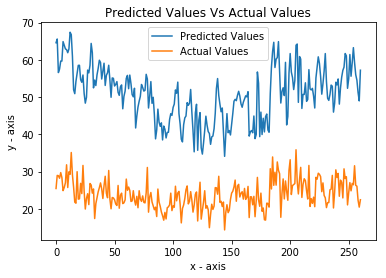

In [25]:
pred_line = preds.detach().numpy()
target_line =  target_tensor.detach().numpy()
plt.plot(pred_line,  label = "Predicted Values")
plt.plot(target_line,  label = "Actual Values")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Predicted Values Vs Actual Values')
# show legend on the plot
plt.legend()
# Display the graph.
plt.show()

**10. Training Epochs**

As we can see, that the loss is very high. We need to keep updating the paramaters weight and bias until we converge the model to reach the optimal solution. Training epochs defines that total number of times the learning algorithm wiil work through the entire dataset. One epoch tells that each sample in the training dataset has had an opportunity to update the internal model parameters. 

In [26]:
for i in range(190):
    preds = model(input_tensor)
    loss = mse(preds, target_tensor)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-4
        b -= b.grad * 1e-4
        w.grad.zero_()
        b.grad.zero_()

In [27]:
preds = model(input_tensor)
loss = mse(preds, target_tensor)
print(loss)

tensor(7.2462, dtype=torch.float64, grad_fn=<DivBackward0>)


**11. Comparision after training epochs**

In the below graph, we can see that actual values and predicted values are quite close. 

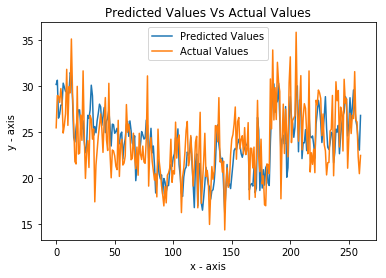

In [28]:
pred_line = preds.detach().numpy()
target_line =  target_tensor.detach().numpy()
plt.plot(pred_line,  label = "Predicted Values")
plt.plot(target_line,  label = "Actual Values")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Predicted Values Vs Actual Values')
# show legend on the plot
plt.legend()
# Display the graph.
plt.show()

**Conclusion**
In this blog, we have learned linear regression basics using PyTorch like Tensors, Learning Rate, MSE. After reading this, I hope you can create both linear and multilinear regression model. You can also find this example of [github](https://github.com/abhimanyu1990/Pytorch-Examples).

***Thank You***